## Curve fitting
Through curve fitting exercise, you will understand the basics of regression.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import default_settings as default

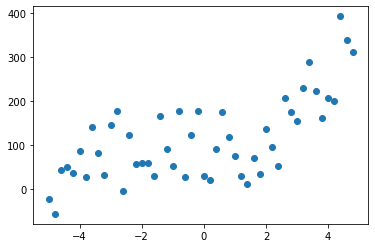

In [2]:
# load samples.
with open('data/regression_samples.txt') as f:
    lines = f.read().split('\n')
X = [float(line.split()[0]) for line in lines if len(line.split()) > 0]
Y = [float(line.split()[1]) for line in lines if len(line.split()) > 0]

X = np.array(X)
Y = np.array(Y)
# display the points.
plt.scatter(X, Y)

## problem description
You will find a curve that fit the above scatter the best.   
Let's assume the curve is described as: f(x, w) = a + b * x + c * x^2 + d * x^3.  
Your task is to find w = [a, b, c, d].   
  
Here is our approach.  

1. Initialize w with some numbers.
2. Calculate how good f(x, w) fits the scatters by defining the cost function. For now, cost function is the root mean square error devided by the number of points. 
3. Update w using gradient descent, until the cost becomes small enough. 

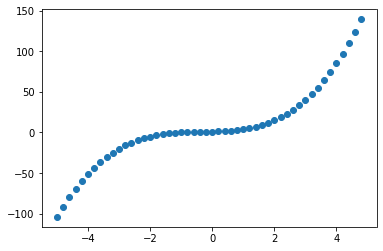

In [3]:
# initilize w.
w = [1, 1, 1, 1]

# define function. 
def f_(x, w):
    ### WRITE YOUR OWN CODES ### 
    y = w[0] + w[1] * x + w[2] * np.power(x,2) + w[3] * np.power(x,3)
    return y


# calculate predictions y
Y_dash = f_(X, w)
# display the points.
plt.scatter(X, Y_dash)


In [4]:
# define cost function.
def cost_function(w, predictions, targets):
    ### WRITE YOUR OWN CODES ### 
    sum = 0
    grad_a, grad_b, grad_c, grad_d = 0, 0, 0, 0
    N = len(targets)
    for y_p, y_t in zip (predictions, targets):
        tmp = np.sqrt(((y_t - y_p) ** 2).mean())
        sum += tmp / N
    return sum


In [5]:
cost = cost_function(w, Y_dash, Y)
print(cost)

107.55998800000002


In [6]:
learning_rate = 0.001
error_point = 0.1
iteration = 100

# update w using gradient descent. 
def update_w(w, X, Y):
    ### WRITE YOUR OWN CODES ### 
    count = 0
    while count < iteration:
        Y_dash = f_(X, w)
        cost = cost_function(w, Y_dash, Y)

        if cost < error_point:
            break

        w[0] -= (learning_rate * cost * w[0])
        w[1] -= (learning_rate * cost * w[1])
        w[2] -= (learning_rate * cost * w[2])
        w[3] -= (learning_rate * cost * w[3])


        count += 1
    return w


In [7]:
print(w)
w0 = update_w(w, X, Y)
print(w0)

[1, 1, 1, 1]
[4.154402071864655e-06, 4.154402071864655e-06, 4.154402071864655e-06, 4.154402071864655e-06]


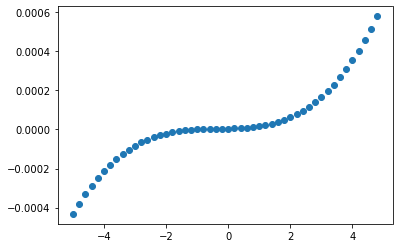

In [8]:
Y_dash2 = f_(X, w0)
plt.scatter(X, Y_dash2)